# Chapter 4 - Linear Methods for Classification

### Section 4.1

* Linear method for classification -> decision boundaries are linear.
* Discriminant methods model a discriminant function for each class and classify a point $x$ to the class with maximum discriminant value. A posterior probability function is also considered a discriminant method.
* Linear methods are also those where we apply a monotonic linear transformation to the decision boundary, e.g. $logit(\frac{p}{1-p})$.
* Linear discriminant analysis (LDA) and linear logistic regression result in log-odds or logit decision boundaries.

### Section 4.2

* Indicator response matrix - binary encoding of response target. Generalized to predicting more than 1 class.
* You can linear regress on and indicator response matrix, just like in Chapter 3, fit to the regression for all classes simultaneously (multiple linear regression).
* Classify to the class with the largest fitted prediction.
* The sum of predicted values (across classes) should equal 1, as long as there is an intercept.
* When K (# of classes) >= 3 we run into problems because we have a single linear decision boundary to separate the classes. At least one class will be bisected by the decision boundary.
* A polynomial boundary of degree up to K-1 may be needed to create an accurate boundary around K classes.

In [1]:
import pandas
from sklearn import datasets

# Load the iris classification data
iris = datasets.load_iris()
print('Target names:')
print(iris.target_names)
Y = iris.target
print('Feature names:')
print(iris.feature_names)
X = iris.data

Target names:
['setosa' 'versicolor' 'virginica']
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


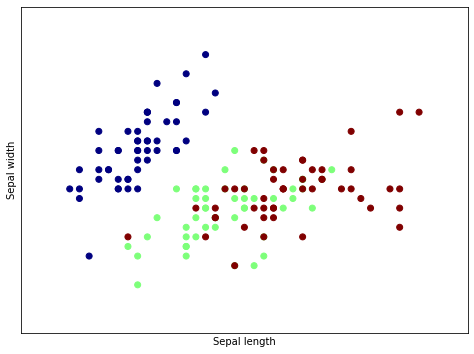

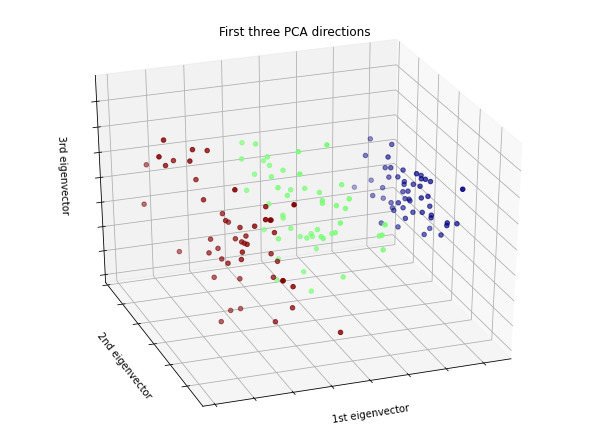

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# Import iris data
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.jet)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.jet)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=10)

In [5]:
y_train

array([1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2,
       2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0,
       2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [6]:
# Create an indicator response matrix
y_train_encoded = pandas.get_dummies(y_train).values
y_test_encoded = pandas.get_dummies(y_test).values
y_train_encoded[0:10]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train_encoded)
lr_train_predict = lr.predict(X_train)
lr_test_predict = lr.predict(X_test)

In [9]:
lr_train_predict

array([[-0.10880129,  0.88877386,  0.22002743],
       [-0.04610103, -0.07946781,  1.12556884],
       [ 0.15881846,  0.72114187,  0.12003967],
       [ 0.12393228,  0.37314439,  0.50292333],
       [ 0.22147377,  0.2473549 ,  0.53117133],
       [ 1.15769199, -0.05980603, -0.09788596],
       [ 1.02293023,  0.02667591, -0.04960615],
       [ 0.11791298,  0.39022958,  0.49185744],
       [ 0.89800685,  0.23732071, -0.13532756],
       [ 0.00412843,  0.21784477,  0.7780268 ],
       [ 0.84750108,  0.24282143, -0.09032251],
       [ 0.827394  ,  0.29785377, -0.12524778],
       [-0.04265389,  0.40855253,  0.63410136],
       [ 0.26210482,  0.61004612,  0.12784905],
       [-0.1270868 ,  0.20631934,  0.92076747],
       [ 1.0237325 ,  0.03353703, -0.05726953],
       [-0.04422878,  0.29053247,  0.75369631],
       [ 0.78637759,  0.40105734, -0.18743493],
       [ 0.1925983 ,  0.54136355,  0.26603815],
       [-0.03720066,  0.45922499,  0.57797567],
       [ 0.88653431,  0.20373344, -0.090

In [10]:
# Probabilities should sum to 1.
lr_train_predict.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
# Pick index with best score (= class with best score in this case)
lr_train_classified = [pandas.Series(x).idxmax() for x in lr_train_predict]
lr_test_classified = [pandas.Series(x).idxmax() for x in lr_test_predict]

In [12]:
lr_train_classified[0:10]

[1, 2, 1, 2, 2, 0, 0, 2, 0, 2]

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def summarize_apr(y_true, y_predicted, tag):
    print('''
        {tag}
        ----------------------------------
        Accuracy: {accuracy}
        Precision: {precision}
        Recall: {recall}
    '''.format(tag=tag,
                accuracy=round(accuracy_score(y_true, y_predicted), 4),
                precision=round(precision_score(y_true, y_predicted, average='macro'), 4),
                recall=round(recall_score(y_true, y_predicted, average='macro'), 4)))

In [14]:
summarize_apr(y_train, lr_train_classified, 'Linear Regression Train')
summarize_apr(y_test, lr_test_classified, 'Linear Regression Test')


        Linear Regression Train
        ----------------------------------
        Accuracy: 0.88
        Precision: 0.8916
        Recall: 0.8729
    

        Linear Regression Test
        ----------------------------------
        Accuracy: 0.76
        Precision: 0.8061
        Recall: 0.7815
    


### Section 4.3
* For proper classification, we are really looking to find the posterior probabilities $P(G|X=x)$.
* By decomposing the above posterior probability with Bayes theorem, it is clear that being able to estimate $P(X|G=g)$ is sufficient. Many techniques are based on estimating this density (linear/quadratic discriminant analysis, Gaussian mixtures, nonparametric density estimates, Naive Bayes).

**LDA**
* LDA assumes each class density follows a multivariate Gaussian with a common covariance matrix for each class k. The log odds ratio is used to compare class probabilities.
* "Odds ratio for a success rate of $p$ is defined as $\frac{p}{1-p}$. A nice feature of this ratio is the plain English explanation you can do with it in a betting scenario. As an example, assume p=0.8. Your odds ratio is $\frac{0.80}{1-0.8}=\frac{0.80}{0.20}=4$. So you could say you are four times more likely to win than lose, or vice versa. Lots of horse race betting (and their pay off) also works in the same way."
* Odds ratio in our context is used to say: Given X, probability that the observation belongs to class $k$ is $m$ times more likely than the probability that observation belongs to class $l$.
* A linear hyperplane will become the boundary between any 2 given classes.
* If we do not assume homogeneous covariance matrices, we get quadratic discriminant analysis.
* Not robust to gross outliers (see pg. 128).

**Regularized QDA**
* We can regularize QDA by shrinking the disparate covariances of QDA towards the common covariance of LDA.

**Reduced Rank LDA**
* Sphering is a linear process which applied to each point leads to random variables with mean 0 and the identity matrix as covariance matrix, meaning that they are uncorrelated and all have variance 1.
* Assuming we have sphered our data, only the projection of $X^*$ onto $\mu_{1}^{*} - \mu_{2}^{*}$ is needed. That is, project the data onto the distance between its centroids.  This projects the data into a subspace of rank $K-1$, which is significant reduction for large $p$. We lose no information in this projection.
* Fisher's method give us this optimal projection, so that the centroids are as spread out as possible.
* Amounts to the regression of an indicator matrix followed by an eigen-decomposition of $\hat{Y}^TY$.

In [15]:
# First lets try LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, 
                                 store_covariance=False, tol=0.0001)

lda.fit(X_train, y_train)
lda_train_classified = lda.predict(X_train)
lda_test_classified = lda.predict(X_test)

summarize_apr(y_train, lda_train_classified, 'LDA Train')
summarize_apr(y_test, lda_test_classified, 'LDA Test')


        LDA Train
        ----------------------------------
        Accuracy: 0.99
        Precision: 0.9905
        Recall: 0.9892
    

        LDA Test
        ----------------------------------
        Accuracy: 0.98
        Precision: 0.9804
        Recall: 0.9825
    


In [16]:
# Now let's use it with regularization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', priors=None, n_components=None, 
                                 store_covariance=False, tol=0.0001)

lda.fit(X_train, y_train)
lda_train_classified = lda.predict(X_train)
lda_test_classified = lda.predict(X_test)

summarize_apr(y_train, lda_train_classified, 'LDA Regularization Train')
summarize_apr(y_test, lda_test_classified, 'LDA Regularization Test')


        LDA Regularization Train
        ----------------------------------
        Accuracy: 0.97
        Precision: 0.9698
        Recall: 0.9687
    

        LDA Regularization Test
        ----------------------------------
        Accuracy: 0.98
        Precision: 0.9804
        Recall: 0.9825
    


In [17]:
# Now let's use QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, tol=0.0001)

qda.fit(X_train, y_train)
qda_train_classified = qda.predict(X_train)
qda_test_classified = qda.predict(X_test)

summarize_apr(y_train, qda_train_classified, 'QDA Train')
summarize_apr(y_test, qda_test_classified, 'QDA Test')


        QDA Train
        ----------------------------------
        Accuracy: 0.98
        Precision: 0.9794
        Recall: 0.9794
    

        QDA Test
        ----------------------------------
        Accuracy: 0.98
        Precision: 0.9804
        Recall: 0.9825
    


In [18]:
# Now let's use QDA with regularziation
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.50, tol=0.0001)

qda.fit(X_train, y_train)
qda_train_classified = qda.predict(X_train)
qda_test_classified = qda.predict(X_test)

summarize_apr(y_train, qda_train_classified, 'QDA Regularization Train')
summarize_apr(y_test, qda_test_classified, 'QDA Regularization Test')


        QDA Regularization Train
        ----------------------------------
        Accuracy: 0.95
        Precision: 0.9485
        Recall: 0.9491
    

        QDA Regularization Test
        ----------------------------------
        Accuracy: 0.98
        Precision: 0.9804
        Recall: 0.9825
    


### Section 4.4 (Logistic regression)

* Model posterior probabilities of the K classes via linear functions in x, while at the same time ensuring they sum to one and predictions remain in [0, 1].


* Model specified in terms of $K-1$ log-odds or logit transformations.

$log\frac{Pr(G=1|X=x)}{Pr(G=K|X=x)}=\beta_{10} + \beta_{1}^{T}x$

$log\frac{Pr(G=2|X=x)}{Pr(G=K|X=x)}=\beta_{20} + \beta_{2}^{T}x$

...

$log\frac{Pr(G=K-1|X=x)}{Pr(G=K|X=x)}=\beta_{(K-1)0} + \beta_{K-1}^{T}x$

* Method is invariant to the choice of denominator.

* When K=2 the method simplifies greatly since there is only 1 linear function.

* Models are usually fit via MLE. The systems of MLE equations to solve are non-linear in $\beta$ so we use something like the Newton-Rhapson method.

* There is a connection between logistic regression and weighted least squares fit. This provides a convenient algorithm and some other inferential tools.

* L1 regularization (lasso) can be applied to the logistic regression model.

* Generally thought as a safer, more robust bet than using LDA, since it relies on fewer assumptions.

In [19]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                          intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', 
                          max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

logr.fit(X_train, y_train)
logr_train_classified = logr.predict(X_train)
logr_test_classified = logr.predict(X_test)

summarize_apr(y_train, logr_train_classified, 'Logistic Regression Train')
summarize_apr(y_test, logr_test_classified, 'Logistic Regression Test')


        Logistic Regression Train
        ----------------------------------
        Accuracy: 0.95
        Precision: 0.9573
        Recall: 0.9462
    

        Logistic Regression Test
        ----------------------------------
        Accuracy: 0.86
        Precision: 0.8986
        Recall: 0.8772
    


### Section 4.5 (Separating Hyperplanes)

* Methods that construct decision boundaries to explicitly separate the data into classes as well as possible.
* Form the basis for SVM (support vector machines).
* Rosenblatt's perceptron - tries to find a separating hyperplane by minimizing the distances of misclassified points to the decision boundary. Forms the foundation behind neural networks. Number of problems with this algorithm - non-unique solution that depends on starting values. Can require a large number of steps. Does not converge with inseparable data.
* Optimal separating hyperplanes separate the two classes and maximizes the distance to the closest point from either class. This provides a unique solution and leads to better classification performance on the test data.

In [20]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, shuffle=True, 
                        verbose=0, eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

perceptron.fit(X_train, y_train)
perceptron_train_classified = perceptron.predict(X_train)
perceptron_test_classified = perceptron.predict(X_test)

summarize_apr(y_train, perceptron_train_classified, 'Perceptron Regression Train')
summarize_apr(y_test, perceptron_test_classified, 'Perceptron Regression Test')


        Perceptron Regression Train
        ----------------------------------
        Accuracy: 0.42
        Precision: 0.7828
        Recall: 0.4389
    

        Perceptron Regression Test
        ----------------------------------
        Accuracy: 0.46
        Precision: 0.8043
        Recall: 0.4208
    
